# Mall Customer Segmentation

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
dataset <- read_csv("./input/Mall_Customers.csv", )

Rows: 200 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Gender
dbl (4): CustomerID, Age, Annual Income (k$), Spending Score (1-100)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(dataset)

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [4]:
# colnames(dataset) <- c("CustomerID", "Gender", "Age", "Income", "Spending")

## Exploratory Data Analysis

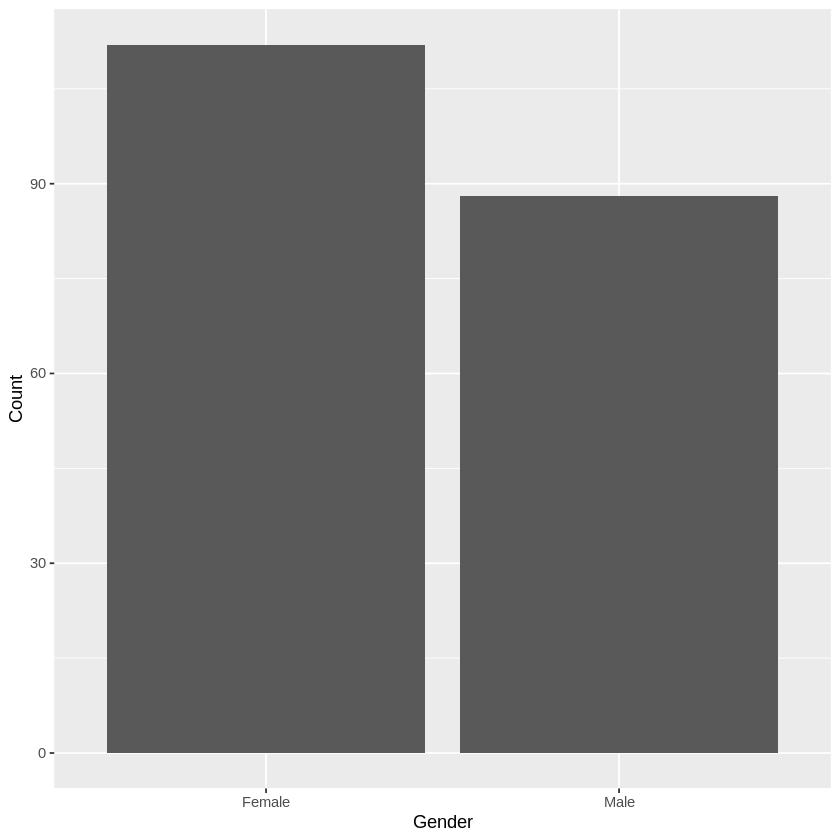

In [5]:
dataset %>%
    group_by(Gender) %>%
    summarize(Count = n()) %>%
    ggplot() + 
    geom_bar(aes(x=Gender,y=Count), stat="identity")

In [6]:
#library(gridExtra)
## arrange multiple plots

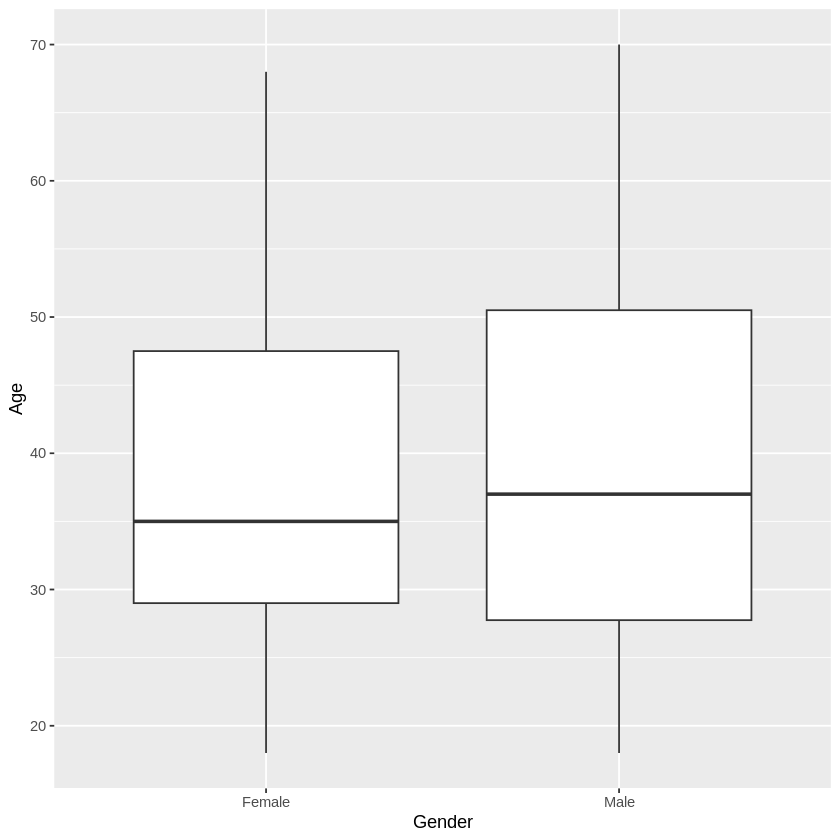

In [7]:
dataset %>%
    group_by(Gender) %>%
    ggplot(aes(x=Gender, y=Age)) +
    geom_boxplot()

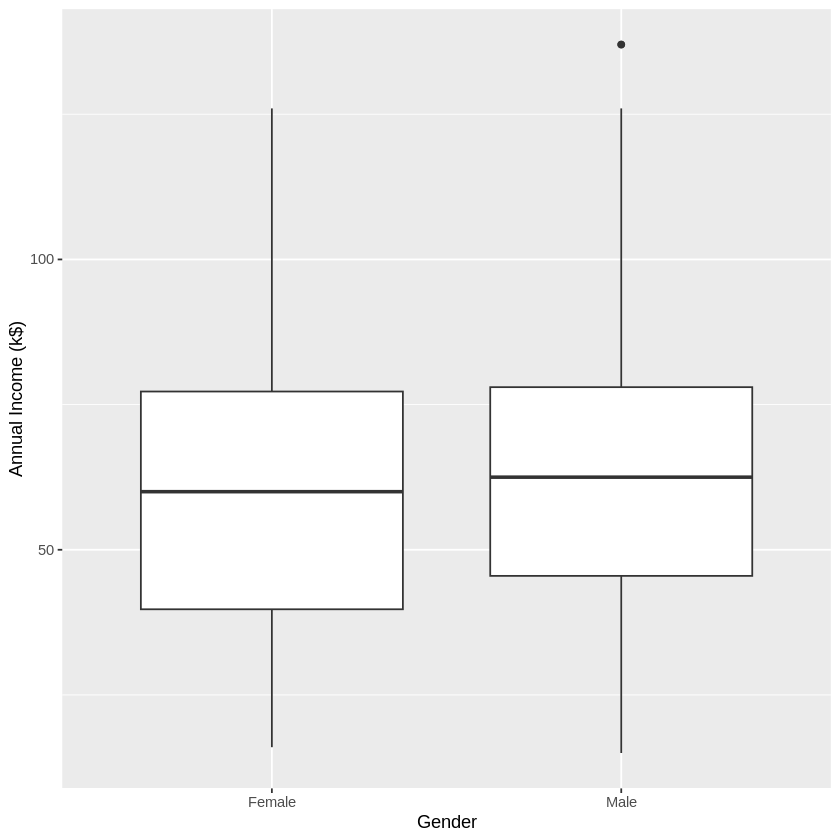

In [8]:
dataset %>%
    group_by(Gender) %>%
    ggplot(aes(x=`Gender`, y=`Annual Income (k$)`)) +
    geom_boxplot()

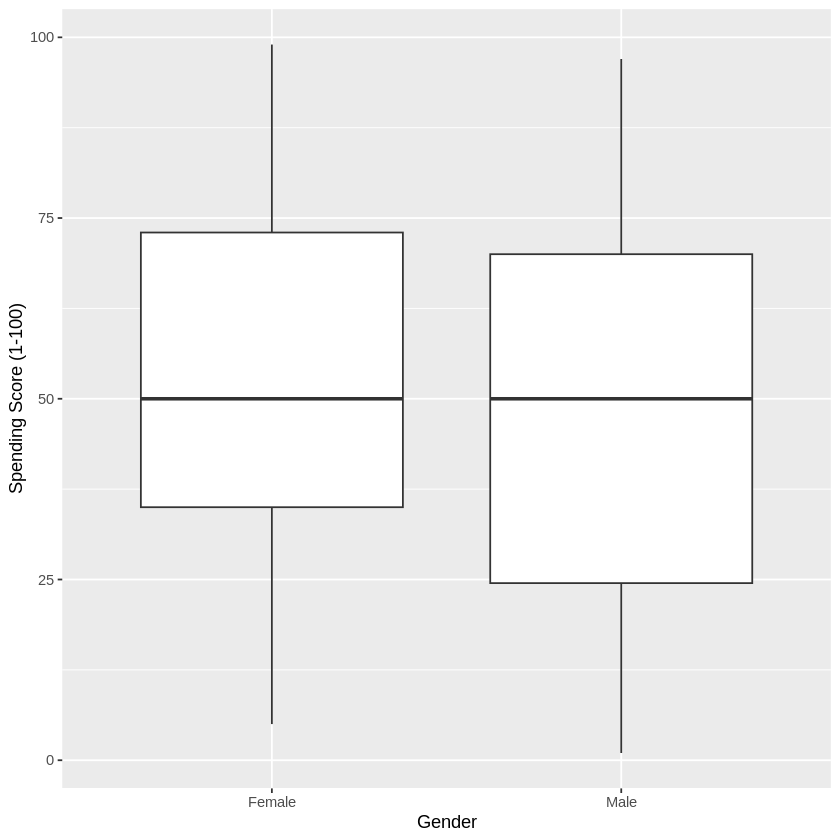

In [9]:
dataset %>%
    group_by(Gender) %>%
    ggplot(aes(x=`Gender`, y=`Spending Score (1-100)`)) +
    geom_boxplot()

In [10]:
## scatter plot

## KMeans Clustering

In [11]:
#?kmeans
fitting <- dataset %>% select(`Annual Income (k$)`, `Spending Score (1-100)`)
kmeans_res <- kmeans(fitting, centers=5)
fitting$cluster <- kmeans_res$cluster
head(fitting)

Annual Income (k$),Spending Score (1-100),cluster
<dbl>,<dbl>,<int>
15,39,4
15,81,4
16,6,4
16,77,4
17,40,4
17,76,4


## Visualizing the Cluster

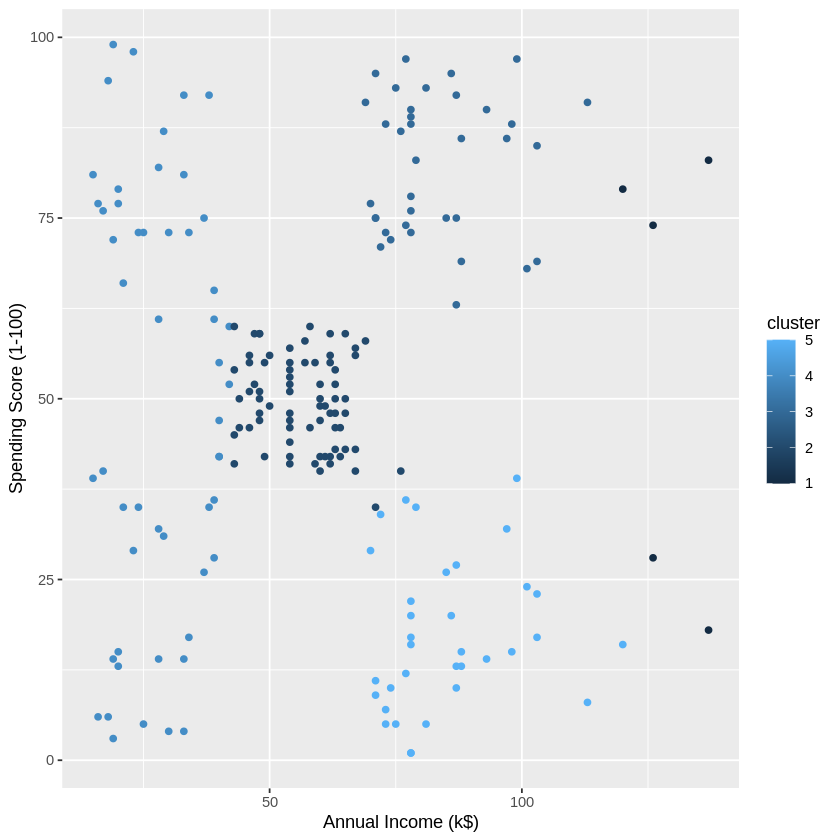

In [12]:
fitting %>%
    ggplot(aes(x=`Annual Income (k$)`, y=`Spending Score (1-100)`, color=cluster)) +
    geom_point()